In [1]:
from selenium import webdriver
from bs4 import BeautifulSoup
import pandas as pd
import requests
import time
from datetime import datetime
import matplotlib.pyplot as plt

한국금거래소는 post방식으로서  
클라이언트의 요청에 response하므로 먼저 requests모듈을 이용하여  
head정보 및 data params를 함께 전달하여  
페이지 소스 획득이 가능한지 살펴본다.

개발자 - 네트워크 - headers에서 Request Mothod: POST임을 확인할 수 있다.

방식의 차이  
네이버 영화(get방식) : 영화별로 링크 뒤에 번호가 달랐음  
금거래소(Post방식): 변하는 url이 없다. 그래서 payload에 알려줘야하는것.

header 및 payload

In [2]:
# 크롬 드라이버 구동 및 객체 생성
driver = webdriver.Chrome('C:\pywork\data_course\chromedriver\chromedriver.exe')

In [3]:
url = 'https://www.koreagoldx.co.kr/main/html.php?agencyCode=&htmid=goods/gold_list.html'

In [4]:
# 구동한 크롬드라이버의 get()메서드에 url을 전달하여 페이지 요청 및 응답 받음
driver.get(url)

구동 중인 크롬브라우저에서 해당 웹페이지의 필요 정보 클릭   
--> css selector 활용하여 전체 클릭 

In [ ]:
#  (전체)를 copy selector
# #contents > div.sub_content > div > div.service_cont > div.clear > ul.graph_dt_buttons > li:nth-child(6) > label

In [5]:
all_element = driver.find_element_by_css_selector('#contents > div.sub_content > div > div.service_cont > div.clear > ul.graph_dt_buttons > li:nth-child(6) > label')

In [6]:
all_element.click()

In [7]:
next_btn = driver.find_element_by_css_selector('#example-table > div.tabulator-footer > span > button:nth-child(4)')

In [11]:
 html = driver.page_source

In [12]:
html = driver.page_source
soup = BeautifulSoup(html, 'html.parser')

In [13]:

#df_gold = pd.DataFrame(columns=["writeday","spure", "ppure", "p18k", "p14k"])
ligold = []
for j in range(269):
        gold_list = soup.select('div.tabulator-cell')
        lg = [gold_list[i].text for i in range(len(gold_list))] 
        ligold.append(lg)
        next_btn.click()
        time.sleep(1)
        html = driver.page_source
        soup = BeautifulSoup(html, 'html.parser')

ligold

[['2021.06.10',
  '292,000',
  '272,000',
  '195,900',
  '151,000',
  '2021.06.09',
  '293,000',
  '272,500',
  '196,200',
  '151,300',
  '2021.06.08',
  '293,000',
  '274,000',
  '197,300',
  '152,100',
  '2021.06.07',
  '292,000',
  '273,500',
  '197,000',
  '151,800',
  '2021.06.05',
  '292,000',
  '274,000',
  '197,300',
  '152,100',
  '2021.06.04',
  '291,000',
  '273,000',
  '196,600',
  '151,600',
  '2021.06.03',
  '294,500',
  '275,000',
  '198,000',
  '152,700',
  '2021.06.02',
  '292,500',
  '275,000',
  '198,000',
  '152,700',
  '2021.06.01',
  '293,500',
  '275,000',
  '198,000',
  '152,700',
  '2021.05.31',
  '293,500',
  '275,000',
  '198,000',
  '152,700',
  '2021.05.29',
  '294,500',
  '275,500',
  '198,400',
  '153,000',
  '2021.05.28',
  '293,500',
  '275,000',
  '198,000',
  '152,700',
  '2021.05.27',
  '294,500',
  '276,000',
  '198,800',
  '153,200',
  '2021.05.26',
  '295,500',
  '275,500',
  '198,400',
  '153,000',
  '2021.05.25',
  '293,000',
  '273,000',
  '196

In [ ]:
## 다른 방법
data_test = driver.find_element_by_class_name('tabulator-table')
## 아래는 계속 내 방법

In [14]:
gold = []
for i in ligold:
    gold = gold + i

In [15]:
len(gold)

20145

In [20]:
20145/5

4029.0

In [16]:
import numpy as np 
import pandas as pd 

In [17]:
gold2 = np.array(gold).reshape(4029,5) 

In [18]:
df_gold = pd.DataFrame(gold2, columns = ['ymd','buying','gold','18k','24k'])

In [19]:
df_gold

,ymd,buying,gold,18k,24k
0,2021.06.10,"292,000","272,000","195,900","151,000"
1,2021.06.09,"293,000","272,500","196,200","151,300"
2,2021.06.08,"293,000","274,000","197,300","152,100"
3,2021.06.07,"292,000","273,500","197,000","151,800"
4,2021.06.05,"292,000","274,000","197,300","152,100"
...,...,...,...,...,...
4024,2008.03.17,"138,050","107,500","88,687","69,359"
4025,2008.03.15,"133,650","106,000","87,450","68,391"
4026,2008.03.14,"130,020","102,000","84,150","65,810"
4027,2008.03.13,"128,370","100,500","82,912","64,842"


In [29]:
# 데이터 저장
df_gold.to_csv('C:\pywork\data_course\mydata\gold.csv', index = False)

In [ ]:
df_gold.sort_index()

In [30]:
##date, buy, sell_24k

df_24k = df_gold[['ymd', 'buying', '24k']]

In [31]:
df_24k

,ymd,buying,24k
0,2021.06.10,292000,151000
1,2021.06.09,293000,151300
2,2021.06.08,293000,152100
3,2021.06.07,292000,151800
4,2021.06.05,292000,152100
...,...,...,...
4024,2008.03.17,138050,69359
4025,2008.03.15,133650,68391
4026,2008.03.14,130020,65810
4027,2008.03.13,128370,64842


오브젝트 타입인 날짜의 날짜형 변환을 위해 datetime 모듈의 datetime.strp() 메서드 적용

In [32]:
df_24k['ymd'][0]

'2021.06.10'

In [33]:
datetime.strptime(df_24k['ymd'][0], '%Y.%m.%d')

datetime.datetime(2021, 6, 10, 0, 0)

In [34]:
date_gold = [datetime.strptime(date, '%Y.%m.%d') for date in df_24k['ymd']]

In [36]:
df_24k['ymd'] = date_gold

C:\Users\admin\Anaconda3\lib\site-packages\ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """Entry point for launching an IPython kernel.


In [37]:
df_24k

,ymd,buying,24k
0,2021-06-10,292000,151000
1,2021-06-09,293000,151300
2,2021-06-08,293000,152100
3,2021-06-07,292000,151800
4,2021-06-05,292000,152100
...,...,...,...
4024,2008-03-17,138050,69359
4025,2008-03-15,133650,68391
4026,2008-03-14,130020,65810
4027,2008-03-13,128370,64842


C:\Users\admin\Anaconda3\lib\site-packages\pandas\plotting\_matplotlib\converter.py:103: FutureWarning: Using an implicitly registered datetime converter for a matplotlib plotting method. The converter was registered by pandas on import. Future versions of pandas will require you to explicitly register matplotlib converters.

To register the converters:
	>>> from pandas.plotting import register_matplotlib_converters
	>>> register_matplotlib_converters()
  warnings.warn(msg, FutureWarning)


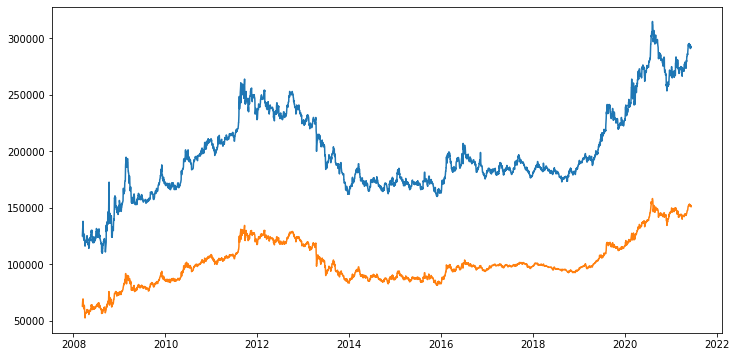

In [38]:
## 시각화

fig, ax = plt.subplots(figsize = (12,6))

ax.plot(date_gold, df_24k['buying'])
ax.plot(date_gold, df_24k['24k'])
#ax.set_xlim([datetime(2007, 1, 1), datetime(2011, 1, 1)])
plt.show()

In [39]:
crisis_data = [
    (datetime(2008, 3, 13), 'Bear Stearns Fails'),
    (datetime(2008, 9, 15), 'Lehman Bankruptcy'),
    (datetime(2012, 12, 19), '18th President Election'),
    (datetime(2017, 5, 9), '19th President Election'),
    (datetime(2020, 2, 12), 'COVID-19 by WHO')
]

In [40]:
gold24 = df_24k.copy()

In [41]:
gold24.set_index('ymd', inplace=True)

In [42]:
gold24.head()

,buying,24k
ymd,,
2021-06-10,292000,151000
2021-06-09,293000,151300
2021-06-08,293000,152100
2021-06-07,292000,151800
2021-06-05,292000,152100


In [44]:
gold24.asof(gold24['date'][0])

KeyError: 'date'

In [46]:
gold24k = gold24.sort_index(ascending = True)

In [48]:
gold24k['buying'].asof(datetime(2008,3,13))

128370

In [49]:
import matplotlib.font_manager as fm

font_path = 'C:\\WINDOWS\\Fonts\\gulim.ttc'

font_name = fm.FontProperties(fname = font_path).get_name()

plt.rcParams['font.family'] = font_name

In [50]:
crisis_data


[(datetime.datetime(2008, 3, 13, 0, 0), 'Bear Stearns Fails'),
 (datetime.datetime(2008, 9, 15, 0, 0), 'Lehman Bankruptcy'),
 (datetime.datetime(2012, 12, 19, 0, 0), '18th President Election'),
 (datetime.datetime(2017, 5, 9, 0, 0), '19th President Election'),
 (datetime.datetime(2020, 2, 12, 0, 0), 'COVID-19 by WHO')]

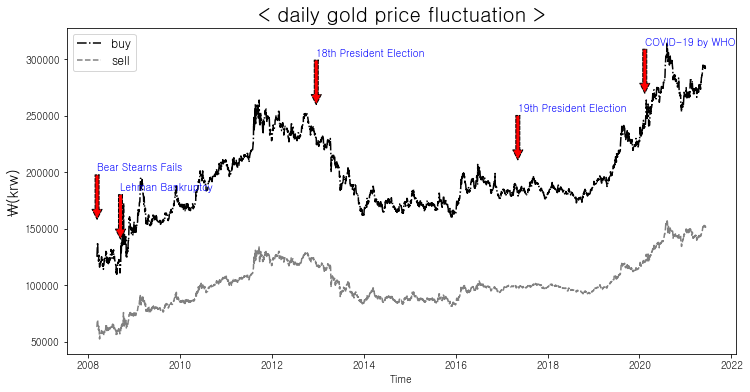

In [51]:
fig, ax = plt.subplots(figsize = (12,6))

ax.plot(gold24k.index, gold24k['buying'], c = 'k', ls = '-.', label = 'buy')
ax.plot(gold24k.index, gold24k['24k'], c='gray', ls = '--', label = 'sell')

for date, event in crisis_data:
    ax.annotate(event, xy=(date, gold24k['buying'].asof(date) + 30000),
                xytext=(date, gold24k['buying'].asof(date) + 80000),
                arrowprops=dict(facecolor='red', headwidth=10, width=4,
                                headlength=10, ls = '--'),
                horizontalalignment='left', verticalalignment='top', c='b', fontsize = 10)
#ax.set_xlim([datetime(2007, 1, 1), datetime(2011, 1, 1)])
ax.set_title('< daily gold price fluctuation >', fontsize = 20)
ax.set_xlabel('Time')
ax.set_ylabel("\\(krw)", fontsize = 15)
ax.legend(loc = 2, fontsize = 12)
plt.show()

In [ ]:
fig,axes=plt.subplots(4,1,figsize=(12,6))

for i in range(4):
    axes[i].plot(df_gold.iloc[:,i])

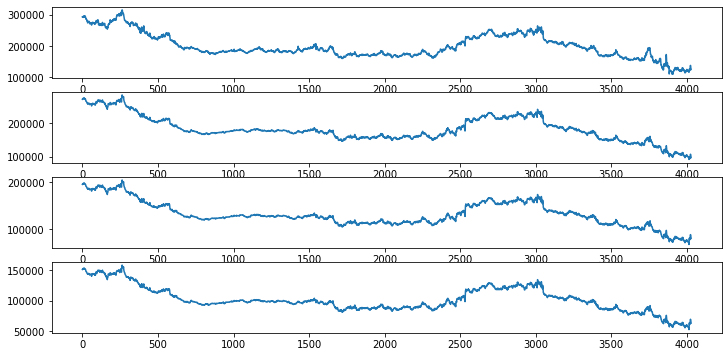

In [100]:
fig,axes=plt.subplots(4,1,figsize=(12,6))

for i in range(4):
    axes[i].plot(list(df_gold[df_gold.columns[i]]))

In [26]:
crisis_data = [
    (datetime(2008, 3, 13), 'Bear Stearns Fails'),
    (datetime(2008, 9, 15), 'Lehman Bankruptcy'),
    (datetime(2012, 12, 19), '18th President Election'),
    (datetime(2017, 5, 9), '19th President Election'),
    (datetime(2020, 2, 12), 'COVID-19 by WHO')
]

In [29]:
import matplotlib.pyplot as plt  

In [28]:
df_gold

,ymd,buying,gold,18k,24k
0,2021.06.10,292000,272000,195900,151000
1,2021.06.09,293000,272500,196200,151300
2,2021.06.08,293000,274000,197300,152100
3,2021.06.07,292000,273500,197000,151800
4,2021.06.05,292000,274000,197300,152100
...,...,...,...,...,...
4024,2008.03.17,138050,107500,88687,69359
4025,2008.03.15,133650,106000,87450,68391
4026,2008.03.14,130020,102000,84150,65810
4027,2008.03.13,128370,100500,82912,64842


C:\Users\admin\Anaconda3\lib\site-packages\matplotlib\backends\backend_agg.py:211: RuntimeWarning: Glyph 49332 missing from current font.
  font.set_text(s, 0.0, flags=flags)
C:\Users\admin\Anaconda3\lib\site-packages\matplotlib\backends\backend_agg.py:211: RuntimeWarning: Glyph 46412 missing from current font.
  font.set_text(s, 0.0, flags=flags)
C:\Users\admin\Anaconda3\lib\site-packages\matplotlib\backends\backend_agg.py:211: RuntimeWarning: Glyph 49692 missing from current font.
  font.set_text(s, 0.0, flags=flags)
C:\Users\admin\Anaconda3\lib\site-packages\matplotlib\backends\backend_agg.py:211: RuntimeWarning: Glyph 44552 missing from current font.
  font.set_text(s, 0.0, flags=flags)
C:\Users\admin\Anaconda3\lib\site-packages\matplotlib\backends\backend_agg.py:180: RuntimeWarning: Glyph 49332 missing from current font.
  font.set_text(s, 0, flags=flags)
C:\Users\admin\Anaconda3\lib\site-packages\matplotlib\backends\backend_agg.py:180: RuntimeWarning: Glyph 46412 missing from cur

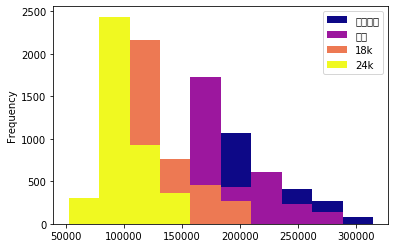

In [75]:
df_gold.plot.hist(cmap = 'plasma')

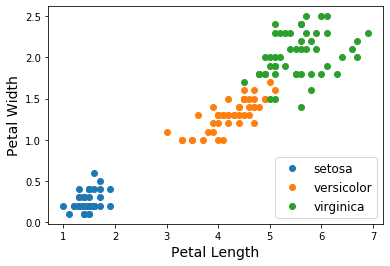

In [74]:
import seaborn as sns
iris = sns.load_dataset('iris')
groups = iris.groupby('species')
fig, ax = plt.subplots()

for name, group in groups:
    ax.plot(group.petal_length, group.petal_width, marker='o', linestyle='',label=name)

ax.legend(fontsize=12, loc='lower right') # legend position
plt.xlabel('Petal Length', fontsize=14)
plt.ylabel('Petal Width', fontsize=14)
plt.show()

In [64]:
df_gold.set_index('고시날짜', inplace = True)

In [54]:
df_gold.dtypes

고시날짜    object
살때순금    object
순금      object
18k     object
24k     object
dtype: object

In [ ]:
15: def remove_comma(x):
16:     return x.replace(',', '')
17: 
18: df['현재가'] = df['현재가'].apply(remove_comma)
19: print(df)
20: print(df.dtypes)

In [20]:
def remove_comma(x):
    return x.replace(',', '')

In [25]:
df_gold = df_gold.astype({'24k': np.int64})
print(df_gold.dtypes)

ymd       object
buying     int64
gold       int64
18k        int64
24k        int64
dtype: object


In [21]:
df_gold = df_gold.applymap(remove_comma)

In [67]:
df_gold.iloc[:,2]

고시날짜
2021.06.10    195900
2021.06.09    196200
2021.06.08    197300
2021.06.07    197000
2021.06.05    197300
               ...  
2008.03.17     88687
2008.03.15     87450
2008.03.14     84150
2008.03.13     82912
2008.03.12     80520
Name: 18k, Length: 4029, dtype: int64

C:\Users\admin\Anaconda3\lib\site-packages\matplotlib\textpath.py:90: RuntimeWarning: Glyph 44256 missing from current font.
  font.set_text(s, 0.0, flags=LOAD_NO_HINTING)
C:\Users\admin\Anaconda3\lib\site-packages\matplotlib\textpath.py:90: RuntimeWarning: Glyph 49884 missing from current font.
  font.set_text(s, 0.0, flags=LOAD_NO_HINTING)
C:\Users\admin\Anaconda3\lib\site-packages\matplotlib\textpath.py:90: RuntimeWarning: Glyph 45216 missing from current font.
  font.set_text(s, 0.0, flags=LOAD_NO_HINTING)
C:\Users\admin\Anaconda3\lib\site-packages\matplotlib\textpath.py:90: RuntimeWarning: Glyph 51676 missing from current font.
  font.set_text(s, 0.0, flags=LOAD_NO_HINTING)
C:\Users\admin\Anaconda3\lib\site-packages\matplotlib\textpath.py:203: RuntimeWarning: Glyph 44256 missing from current font.
  glyph = font.load_char(ccode, flags=LOAD_NO_HINTING)
C:\Users\admin\Anaconda3\lib\site-packages\matplotlib\textpath.py:203: RuntimeWarning: Glyph 49884 missing from current font.
  gly

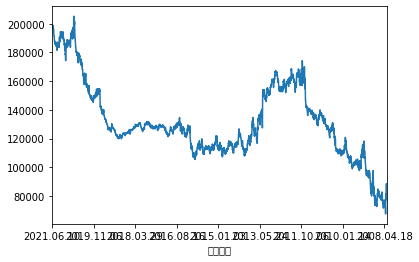

In [66]:
df_gold.iloc[:,2].plot()
plt.show()

In [36]:
df_gold.index.is_unique

True

In [28]:
 ax.annotate(event, xy=(date, gold24k2['buy'].asof(date) + 30000),
                xytext=(date, gold24k2['buy'].asof(date) + 80000),
                arrowprops=dict(facecolor='red', headwidth=10, width=4,
                                headlength=10, ls = '--'),
                horizontalalignment='left', verticalalignment='top', c='b', fontsize = 10)

NameError: name 'ax' is not defined

In [13]:
[len(ligold)]

[269]

In [123]:
# 위에서 한정보를 html에 넣어주고 그걸 여기로 가져오는거..!
html = driver.page_source
soup = BeautifulSoup(html, 'html.parser')

In [124]:
gold_list = soup.select('div.tabulator-cell')

In [78]:
df_gold_test = pd.DataFrame(columns=["writeday","spure", "ppure", "p18k", "p14k"])
df_gold_test

,writeday,spure,ppure,p18k,p14k


In [165]:
df_gold_test.append(gold_test)
df_gold_test

,writeday,spure,ppure,p18k,p14k


In [162]:
df_gold_test

,writeday,spure,ppure,p18k,p14k


In [163]:
df_gold_test.append(gold_test)

,writeday,spure,ppure,p18k,p14k
0,2021.06.09,"293,000","272,500","196,200","151,300"
1,2021.06.08,"293,000","274,000","197,300","152,100"
2,2021.06.07,"292,000","273,500","197,000","151,800"
3,2021.06.05,"292,000","274,000","197,300","152,100"
4,2021.06.04,"291,000","273,000","196,600","151,600"
5,2021.06.03,"294,500","275,000","198,000","152,700"
6,2021.06.02,"292,500","275,000","198,000","152,700"
7,2021.06.01,"293,500","275,000","198,000","152,700"
8,2021.05.31,"293,500","275,000","198,000","152,700"
9,2021.05.29,"294,500","275,500","198,400","153,000"


In [125]:
gold_test = pd.DataFrame(np.array([gold_list[i].text for i in range(len(gold_list))]).reshape(15,5), columns=["writeday","spure", "ppure", "p18k", "p14k"])
gold_test

,writeday,spure,ppure,p18k,p14k
0,2021.06.09,"293,000","272,500","196,200","151,300"
1,2021.06.08,"293,000","274,000","197,300","152,100"
2,2021.06.07,"292,000","273,500","197,000","151,800"
3,2021.06.05,"292,000","274,000","197,300","152,100"
4,2021.06.04,"291,000","273,000","196,600","151,600"
5,2021.06.03,"294,500","275,000","198,000","152,700"
6,2021.06.02,"292,500","275,000","198,000","152,700"
7,2021.06.01,"293,500","275,000","198,000","152,700"
8,2021.05.31,"293,500","275,000","198,000","152,700"
9,2021.05.29,"294,500","275,500","198,400","153,000"


In [170]:
pd.DataFrame([np.array([1,2,3]), np.array([1,2,3])])

,0,1,2
0,1,2,3
1,1,2,3


In [ ]:
next_btn.click() ## 5번 클릭해야함

In [126]:
pd.DataFrame(np.array([gold_list[i].text for i in range(len(gold_list))]).reshape(15,5), columns=["writeday","spure", "ppure", "p18k", "p14k"])

,writeday,spure,ppure,p18k,p14k
0,2021.06.09,"293,000","272,500","196,200","151,300"
1,2021.06.08,"293,000","274,000","197,300","152,100"
2,2021.06.07,"292,000","273,500","197,000","151,800"
3,2021.06.05,"292,000","274,000","197,300","152,100"
4,2021.06.04,"291,000","273,000","196,600","151,600"
5,2021.06.03,"294,500","275,000","198,000","152,700"
6,2021.06.02,"292,500","275,000","198,000","152,700"
7,2021.06.01,"293,500","275,000","198,000","152,700"
8,2021.05.31,"293,500","275,000","198,000","152,700"
9,2021.05.29,"294,500","275,500","198,400","153,000"


In [176]:

#df_gold = pd.DataFrame(columns=["writeday","spure", "ppure", "p18k", "p14k"])
ligold = []
for j in range(5):
    if j <= 268:
        gold_list = soup.select('div.tabulator-cell')
        arr = np.array([gold_list[i].text for i in range(len(gold_list))]).reshape(15,5)
        ligold.append(arr)
        next_btn.click()
        time.sleep(2)
        driver.page_source
        html = driver.page_source
        soup = BeautifulSoup(html, 'html.parser')
    else:
        next_btn.click()
        driver.page_source
        html = driver.page_source
        soup = BeautifulSoup(html, 'html.parser')
        gold_list = soup.select('div.tabulator-cell')
        np.array([gold_list[i].text for i in range(len(gold_list))]).reshape(8,5)

ligold



WebDriverException: Message: chrome not reachable
  (Session info: chrome=91.0.4472.77)


In [141]:
df_gold

,writeday,spure,ppure,p18k,p14k


In [67]:
range(5)

range(0, 5)

In [73]:
import numpy as np

In [76]:
np.array([gold_list[i].text for i in range(len(gold_list))]).reshape(15,5)

array([['2021.06.09', '294,000', '274,000', '197,300', '152,100'],
       ['2021.06.08', '293,000', '274,000', '197,300', '152,100'],
       ['2021.06.07', '292,000', '273,500', '197,000', '151,800'],
       ['2021.06.05', '292,000', '274,000', '197,300', '152,100'],
       ['2021.06.04', '291,000', '273,000', '196,600', '151,600'],
       ['2021.06.03', '294,500', '275,000', '198,000', '152,700'],
       ['2021.06.02', '292,500', '275,000', '198,000', '152,700'],
       ['2021.06.01', '293,500', '275,000', '198,000', '152,700'],
       ['2021.05.31', '293,500', '275,000', '198,000', '152,700'],
       ['2021.05.29', '294,500', '275,500', '198,400', '153,000'],
       ['2021.05.28', '293,500', '275,000', '198,000', '152,700'],
       ['2021.05.27', '294,500', '276,000', '198,800', '153,200'],
       ['2021.05.26', '295,500', '275,500', '198,400', '153,000'],
       ['2021.05.25', '293,000', '273,000', '196,600', '151,600'],
       ['2021.05.24', '295,000', '274,000', '197,300', '152,10

In [65]:
## 0,1,2,3,4 5개가 한 row

for i in range(len(gold_list)):
    1row = []
    for j in range(5):
        while 
        gold_list[i].text

<div class="tabulator-cell" role="gridcell" style="width: 227px; text-align: center; height: 41px;" tabulator-field="spure" title="">294,000</div>

In [46]:
gold_list[1].text

'294,000'

In [47]:
gold_list[2].text

'274,000'

In [48]:
gold_list[3].text

'197,300'

In [49]:
gold_list[4].text

'152,100'

In [53]:
total_gold = [gold_list[i].text for i in range(len(gold_list))]

In [54]:
total_gold[0:5]

['2021.06.09', '294,000', '274,000', '197,300', '152,100']

In [56]:
total_gold[5:10]

['2021.06.08', '293,000', '274,000', '197,300', '152,100']

In [57]:
total_gold[10:15]

['2021.06.07', '292,000', '273,500', '197,000', '151,800']